# Trabalho Final - Deep Learning and Reinforcement Learning

### Integrantes:

###    1) Jurandir Ventura - RM336634
###    2) Marcelo Preto - RM336632
###    3) Fabio Rizzi - RM336656
###    4) Thiago Alexandre – RM336583

# Redes Neurais Convolucionais
# Exercício #8 (OBRIGATÓRIO) - 5 PONTOS

## Inicialmente os alunos deverão escolher entre 4 datasets:

### 1. Selecionar 15 frutas distintas do dataset fruits 360 (Fácil)
### 2. Selecionar todas as frutas do dataset fruits 360 (Médio)
    Disponível em: https://www.dropbox.com/s/kzhuv6xim8ejxp3/fruits.zip
### 3. CoronaHack -Chest X-Ray-Dataset (Médio): Classificar apenas se existe Pneumonia ou Não, opcionalmente classificar a existência de COVID-19:
    Disponível em: https://www.dropbox.com/s/zmo4c6pzwcgd9c4/562468_1022626_bundle_archive.zip
### 4. Dataset Skin Cancer MNIST: HAM10000 (difícil)
    Disponível em: https://www.dropbox.com/s/8o4ysiccspp46ov/skin-cancer-mnist-ham10000.zip

## Com o dataset selecionado deve-se construir uma CNN para a classificação das imagens do dataset selecionado
### Instruções Gerais:
* Utilize a LetNet-5 como exemplo inicial bem como o exemplo visto em sala de aula do dataset minst;
* Inicie o trabalho com parte do dataset vá adicionando gradativamente mais tipos distintos de frutas;
* É permitido usar outras abordagens e arquiteturas;
* É permitido o uso de Autoencoders;
* É obrigatório o uso de CNN;
* É permitido o uso de técnicas de processamento de imagens;
* Não é permitido o uso de modelos pré-treinados;
* Faça uma boa distribuição dos dados de teste e treinamento e validação;

## Com o dataset selecionado deve-se construir uma CNN para a classificação das imagens do dataset selecionado
### Instruções Gerais:
* Aplique os pré-processamentos necessários.
* Apresente a evolução do conjunto de treino e validação.
* Apresente a acurácia do conjunto de testes (opcional).
* O conjunto de teste deve variar entre 20% e 30% do conjunto total de treinamento e deve ter a mesma proporção da quantidade de amostras por classes de forma aleatório. Para o dataset fruits360 o conjunto precisa ser construído, em outras palavras é necessário fazer uma rotina que faça isso, selecionando imagens de forma aleatória e respeitando a proporcionalidade de amostras por classes (todo tipo de fruta deve ter a mesma quantidade).
* Apresente a configuração (estrutura) da rede neural.

## Dicas:
### Utilize as instruções de leituras de diretórios de imagens do próprio Keras (semelhante ao exemplo visto com o dataset de dígitos):

### train_datagen = preprocessing.image.ImageDataGenerator(validation_split=0.20)

### train_generator = train_datagen.flow_from_directory('Dataset',batch_size=200,color_mode = 'grayscale',target_size=(30, 30))


## Arquitetura LeNet-5

![LeNet-5](data/lenet5.png)

**Layer 1: Convolutional** Output: 28x28x6.

**Activation**

**Pooling.** Output: 14x14x6.

**Layer 2: Convolutional**
Output: 10x10x16.

**Activation**

**Pooling**: Output: 5x5x16.

**Flatten.**: 1D

**Layer 3: Fully Connected.**
120 outputs.

**Activation**

**Layer 4: Fully Connected.**
84 outputs.

**Activation**

**Layer 5: Fully Connected (Logits)**
10 outputs.

In [15]:
# Importando as bibliotecas que poderão ser usadas no exercício:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Conv2D, Flatten, Activation, Dense, Dropout, BatchNormalization, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.models import load_model
from keras import preprocessing
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix

from PIL import Image

import math
import time
import os

In [2]:
# Verificando se tem GPU disponível para processamento das imagens. GPU ID será exibido.

print(tf.compat.v2.test.is_gpu_available)
print("GPUs ID available: ", len(tf.config.experimental.list_physical_devices('GPU')))


<function is_gpu_available at 0x0000022094C28E58>
GPUs ID available:  0


## O dataset selecionado é o fruits-360 e vamos selecionar as seguintes 15 frutas, em pastas distintas do DataSet completo:

### 1 - Apricot
### 2 - Blueberry
### 3 - Guava
### 4 - Kiwi
### 5 - Mango
### 6 - Nectarine
### 7 - Orange
### 8 - Papaya
### 9 - Passion Fruit
### 10 - Pineappl
### 11 - Pitahaya Red
### 12 - Raspberry
### 13 - Strawberry
### 14 - Tamarillo
### 15 - Tangelo


## Abaixo um print da estrutura deste dataset menor:

![Struct8](data/Folder_Structure_Ex8.png)

## Preparação dos Parâmetros e Setup geral do exercício:

In [3]:
# Definição das pastas das 15 frutas escolhidas
training_folder = './data/ex8/fruits-360_Modified/Training'
test_folder     = './data/ex8/fruits-360_Modified/Test'
sample_folder   = './data/ex8/fruits-360_Modified/Samples'
print(training_folder + '\n' + test_folder + '\n' + sample_folder)

./data/ex8/fruits-360_Modified/Training
./data/ex8/fruits-360_Modified/Test
./data/ex8/fruits-360_Modified/Samples


## Manipulando imagens, para certificar o funcionamento do dataset

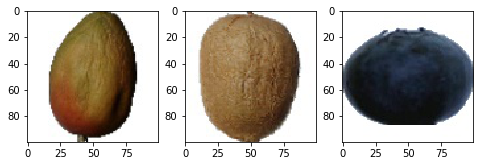

In [4]:
# Antes de começar o trabalho com o Dataset, usamos 3 imagens do dataset numa pasta Samples só para visualizar as imagens

# O objetivo é verificar se existe algum problema em ler os arquivos.


# Local das amostras (neste caso colocamos 3 arquivos)
files_in_dir = os.listdir(sample_folder)
files_per_row = len(files_in_dir)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(8, 5, forward=True)

# Mapear cada arquivo do diretório no gráfico
for i in range(0, len(files_in_dir)):
  file_name = files_in_dir[i]
  image = Image.open(f'{sample_folder}/{file_name}')
  row = math.floor(i / files_per_row)
  col = i % files_per_row
  axs[col].imshow(image)
  #axs[col].axis('off')

# Show the plot
plt.show()

## Parâmetros do Modelo

In [5]:
# Configuração do Modelo: preparação das imagens, classes, número de épocas
batch_size = 15
img_rows, img_cols, img_channels = 32, 32, 1
loss_function = 'categorical_crossentropy'
class_mode = 'categorical'
no_classes = 15 #quantidade de frutas escolhidas
no_epochs = 10
color_mode = 'grayscale'
optimizer = RMSprop(lr = 0.001) #Adam()

## Aplicando configurações no Dataset escolhido

In [6]:

# Preparação das imagens e grupo de treinamento e teste
input_shape = (img_rows, img_cols, img_channels)
train_datagen = preprocessing.image.ImageDataGenerator(validation_split=0.25) #25% para teste do folder 'Training'

train_generator = train_datagen.flow_from_directory(
    training_folder,
    batch_size=batch_size,
    color_mode = color_mode,
    subset='training',
    class_mode = class_mode,
    shuffle = True,
    target_size=(img_rows, img_cols))


valid_generator = train_datagen.flow_from_directory(
    training_folder,
    batch_size=batch_size,
    color_mode = color_mode,
    subset='validation',
    class_mode = class_mode,
    shuffle = False,
    target_size=(img_rows, img_cols))

# Verificamos quantas imagens possuímos nas classes de frutas selecionadas, para treino e para testes

Found 5477 images belonging to 15 classes.
Found 1818 images belonging to 15 classes.


In [8]:
# Fazendo a contagem de imagens para treino e teste
# Este número será usado no fit do modelo (model.fit)

img_train_count = len(train_generator.classes)
img_test_count = len(valid_generator.classes)

train_percent = img_train_count/(img_train_count+img_test_count)*100
test_percent = img_test_count/(img_train_count+img_test_count)*100

print(img_train_count, 'imagens para treino', '==> ', train_percent, '%', '\n')
print(img_test_count, 'imagens para teste', '==> ', test_percent, '%')

5477 imagens para treino ==>  75.07882111034957 % 

1818 imagens para teste ==>  24.921178889650445 %


## Agora vamos criar os modelos de CNN

In [9]:
# Criando o modelo

model = Sequential()

# Padding = Same, significa que o tamanho da saída será o mesmo da entrada / Aplicação de LeNet

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape= input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(no_classes))
model.add(Activation('softmax'))

# Monstrando o resumo do Modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [10]:
# Compilando o modelo

# Criamos a técnica de checkpoint para salvar o modelo e para analisar como está sendo a melhoria do modelo em cada época
# Salvamos sempre o melhor modelo apenas. Se for pior ao carregado, então interrompe pelo Early Stopping.


checkpoint = ModelCheckpoint(filepath = '8-modelo.hdf5',
                             monitor="val_accuracy",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 10,
                              verbose = 1,
                              min_delta = 0.0001)

# Usamos os valores de checkpoint, early stopping e reduce_lr ao fazer o Fit do modelo
# O Parâmetro é justamente callbacks.


callbacks = [earlystop, checkpoint, reduce_lr]

# O otimizador usamos o RMSprop
model.compile(loss = loss_function,
              optimizer = optimizer,
              metrics = 'accuracy')

# Nesta código tentamos rodar o modelo e parar, caso identificamos algum problema ou melhoria, sem perder o que estava feito

try:
    history = model.fit(train_generator,
                              steps_per_epoch = img_train_count // batch_size,
                              epochs = no_epochs,
                              callbacks = callbacks,
                              validation_data = valid_generator,
                              validation_steps = img_test_count // batch_size)
    
except KeyboardInterrupt:
    history = model.history
    

Epoch 1/10
365/365 [==============================] - ETA: 0s - loss: 1.2886 - accuracy: 0.6675
Epoch 00001: val_accuracy improved from inf to 0.91515, saving model to 8-modelo.hdf5
365/365 [==============================] - 20s 55ms/step - loss: 1.2886 - accuracy: 0.6675 - val_loss: 0.6547 - val_accuracy: 0.9152
Epoch 2/10
365/365 [==============================] - ETA: 0s - loss: 0.2629 - accuracy: 0.9365
Epoch 00002: val_accuracy did not improve from 0.91515
365/365 [==============================] - 19s 53ms/step - loss: 0.2629 - accuracy: 0.9365 - val_loss: 0.5537 - val_accuracy: 0.9372
Epoch 3/10
365/365 [==============================] - ETA: 0s - loss: 0.1991 - accuracy: 0.9584
Epoch 00003: val_accuracy improved from 0.91515 to 0.86942, saving model to 8-modelo.hdf5
365/365 [==============================] - 21s 56ms/step - loss: 0.1991 - accuracy: 0.9584 - val_loss: 2.6727 - val_accuracy: 0.8694
Epoch 4/10
365/365 [==============================] - ETA: 0s - loss: 0.2022 - acc

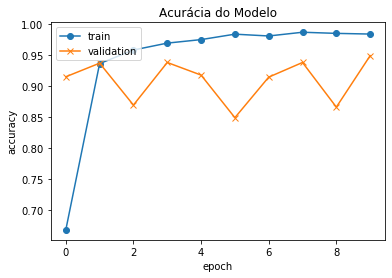

In [11]:
# Plotagem da acurácia de Treinamento e Validação
plt.figure(1)
plt.plot(history.history['accuracy'], 'o-')
plt.plot(history.history['val_accuracy'], 'x-')
plt.title('Acurácia do Modelo')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Apresentando a configuração da rede neural

In [12]:
plot_model(model, to_file='8-fruits.png' , show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


## Agora podemos rodar uma Matrix de Confusão para analisar o modelo por cada fruta do Dataset.

## Vejamos a seguir:

Instructions for updating:
Please use Model.predict, which supports generators.


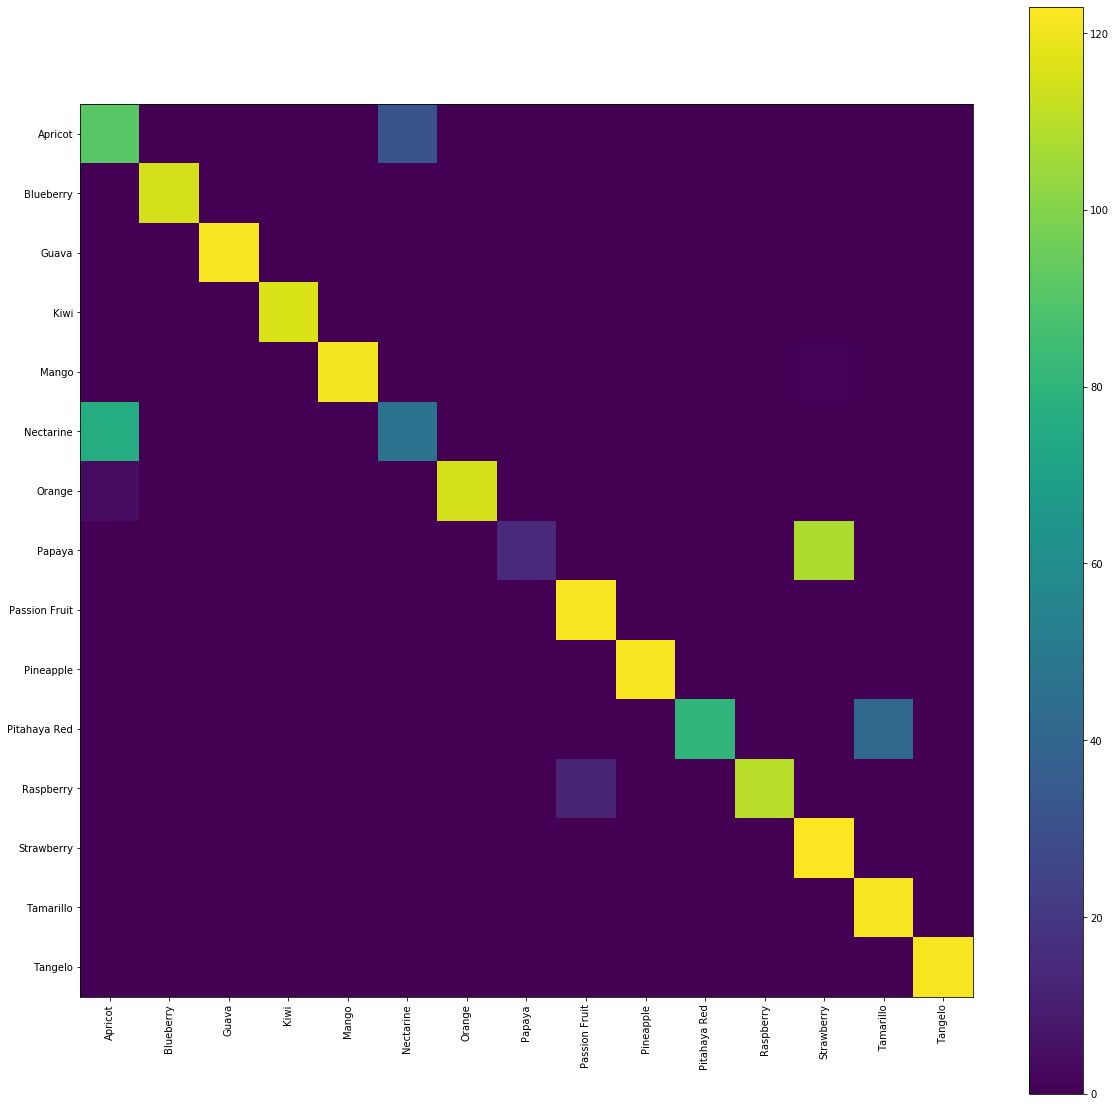

In [16]:
# Fazendo agora uma Matriz de confusão para analisar o modelo

model = load_model('8-modelo.hdf5')

class_labels = valid_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

# Relatório da Matriz de Confusão
Y_pred = model.predict_generator(valid_generator, img_test_count // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(valid_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

## E agora uma forma de tabela para verificação das acurácias por fruta

In [18]:
# Relatório da Matriz de Confusão

Y_pred = model.predict(valid_generator, img_test_count // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Matriz de Confusão')
print(confusion_matrix(valid_generator.classes, y_pred))
print('Relatório da Classificação')
target_names = list(class_labels.values())
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

Matriz de Confusão
[[ 91   0   0   0   0  32   0   0   0   0   0   0   0   0   0]
 [  0 115   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 122   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 116   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 121   0   0   0   0   0   0   0   1   0   0]
 [ 76   0   0   0   0  47   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0 115   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  15   0   0   0   0 108   0   0]
 [  0   0   0   0   0   0   0   0 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 122   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  81   0   0  41   0]
 [  0   0   0   0   0   0   0   0  12   0   0 110   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 123   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 122   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 122]]
Relatório da Classificação
        

# Conclusão:

## Conseguimos usar CNN para classificar frutas, mas percebemos que dependendo do tipo de fruta, a acurácia fica bem baixa. Se tornando mais complexa. Então para um classificador de frutas, em função da variedade e similaridade entre elas, o melhor é criar um classificador específico para cada fruta, para assim se aprofundar naquela aplicação.